# メモ Todo 
## 下がる、下がらないのベルーヌーイ分布で確率をだす。
## poisson分布

# フロー
1. 変数の定義
1. 過去のCSVファイルからデータをロードする
1. 前処理モジュールの定義（当日の上昇率、過去からの上昇率、下降率）
1. CSVロードして、並び替え、必要な日付からにする
1. 前処理部分(現在の値と、過去のからの上昇率、下降率を記したDFを作成)
1. 前処理データの保存

# 変数の定義


In [67]:
# 変数の定義
import pandas as pd
import pandas_profiling as pdp

pram_predict_day=1                   # 1日後の予測をする
#pram_predict_plus_percent=0.70            # 70%で上昇率、下降の設定
#pram_predict_minus_percent=0.20           # 40%で上昇率、下降の設定
pram_predict_plus_percent=0.40             # 40%で上昇率、下降の設定
pram_predict_minus_percent=0.40            # 40%で上昇率、下降の設定
pd.set_option('display.max_columns', 100)


YEAR=""
start_date='2000-01-29'             #元データを2000年からにする

# 過去のCSVファイルからデータをロードする


In [68]:
# 過去のCSVファイルからデータをロードする

class load_csv:
    #CSVは右記サイトのからダウンロード https://stooq.com/q/d/?s=zarjpy
    import pandas as pd
    
    def load(self):
        #df_fx=pd.read_csv('data/zarjpy_d.csv')
        df_fx=pd.read_csv('data/fx_latest.csv')
        df_fx=df_fx.ix[:,['Date','Open','Close']]
        
        print ("配列長さ:",len(df_fx))
        return df_fx

# 前処理モジュールの定義（当日の上昇率、過去からの上昇率、下降率）


In [69]:
# 偏差値
def Deviation_value(df_tmp,x):
    std=df_tmp.std()['Open']

    mean=df_tmp.mean()['Open']
    deviation=(mean-x)*10/std+50

    return deviation


In [70]:
# 前処理モジュールの定義（当日の上昇率、過去からの上昇率、下降率）


def result(day0,xday):          #day0 当日の上昇率(close/open)の結果を返す
    rate=0  #上昇率
    if ((i-xday)>=0 and data_len>(i-xday)): 
        rate= ((df_fx.iloc[i,close_index]/df_fx.iloc[i,open_index])-1)*100
    return rate

def persent(day0,xday):         #　当日のopen価格と、過去のと比較して上昇率(当日open/過去open)を返す
    rate=0  #上昇率
    if ((i-xday)>=0 and data_len>(i-xday)):        
        rate= ((df_fx.iloc[i,open_index]/df_fx.iloc[i-xday,open_index])-1)*100
    return rate

def persent_minus(day0,xday):   #　当日のopen価格と、過去のと比較して下降率(-当日open/過去open)を返す
    rate=0  #上昇率
    if ((i-xday)>=0 and data_len>(i-xday)):        
        rate= ((df_fx.iloc[i,open_index]/df_fx.iloc[i-xday,open_index])-1)*100
        if rate>0:
            rate=0
        #rate=np.log10(rate)
    return rate

# CSVロードして、並び替え、必要な日付からにする


In [71]:
LOAD_CSV=load_csv()
df_fx=LOAD_CSV.load()
#df_fx=df_fx.sort_values(by='Date')

df_fx=df_fx[(df_fx['Date']>=start_date )]
df_fx = df_fx.reset_index(drop=True)
data_len=len(df_fx)

df_fx.tail(10)

配列長さ: 4934


/Users/fujiccofujimoto/.pyenv/versions/Anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/Users/fujiccofujimoto/.pyenv/versions/Anaconda3-2019.10/lib/python3.7/site-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


,Date,Open,Close
4924,2020-04-20,5.693,5.705
4925,2020-04-21,5.691,5.680
4926,2020-04-22,5.652,5.660
4927,2020-04-23,5.644,5.628
4928,2020-04-24,5.605,5.639
4929,2020-04-27,5.623,5.703
4930,2020-04-28,5.680,5.715
4931,2020-04-29,5.714,5.875
4932,2020-04-30,5.849,5.778
4933,2020-05-01,5.754,5.679


In [72]:
df=pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
df = pd.DataFrame(index=['Date'], columns=[
"Date" ,"Close","Open",
"day+1" ,"day+2" ,"day+3",
"day+4" ,"day+5" ,"day+6",
"day+7" ,"day+8" ,"day+9",
"day+10","day+11","day+12",
"day+13","day+14","day+15",
"day+16","day+17","day+18",
"day+19","day+20","day+21",
"day+22","day+23","day+24",
"day+25","day+26","day+27",
"day+28","day+29","day+30",
"std-30","std-60","std-90",
    
"label_up","label_none","label_down",

])


In [73]:
date_index=  df_fx.columns.get_loc('Date')
close_index= df_fx.columns.get_loc('Close')
open_index=  df_fx.columns.get_loc('Open')

#df_fx.head(8)

# 前処理部分　（現在の値と、過去のからの上昇率、下降率を記したDFを作成）



In [74]:

# 前処理部分　（現在の値と、過去のからの上昇率、下降率を記したDFを作成
for i in range(data_len) :
    Date_day=df_fx.iloc[i,date_index ]

    if i%100==0:
        print('{0:.1%}'.format(i/data_len),end=" ")
        exit

    #当日のOPENの株価
    day0         =df_fx.iloc[i,open_index]
    day0_open    =df_fx.iloc[i,open_index] 
    day0_close   =df_fx.iloc[i,close_index] 

    #その後の結果から正解ラベルを作成
    label_up=0     #上昇
    label_none=0   #変化少ない
    label_down=0   #下降

    #正解データの計算  (pram_predict_day) 日後に、(pram_predict_persent)％の前後がある
    prediction=result(day0_open,pram_predict_day)    

    
    # ３つのらべるの場合
    if prediction>=      pram_predict_plus_percent:
        label_up  =1        #上昇
        label_none=0        #そのまま
        label_down=0        #下降
    elif prediction<=   -pram_predict_minus_percent:
        label_up  =0        #上昇
        label_none=0        #そのまま
        label_down=1        #下降
    else:
        
        label_up  =0        #上昇
        label_none=1        #そのまま
        label_down=0        #下降
    
  
    Deviation30=Deviation_value(df.tail(30),day0_open)
    Deviation60=Deviation_value(df.tail(60),day0_open)
    Deviation90=Deviation_value(df.tail(90),day0_open)
    
    series=pd.Series([Date_day,day0_close,day0_open,
                      persent(day0,1),persent(day0,2),persent(day0,3),
                      persent(day0,4),persent(day0,5),persent(day0,6),
                      persent(day0,7),persent(day0,8),persent(day0,9),
                      persent(day0,10),persent(day0,11),persent(day0,12),
                      persent(day0,13),persent(day0,14),persent(day0,15),
                      persent(day0,16),persent(day0,17),persent(day0,18),
                      persent(day0,19),persent(day0,20),persent(day0,21),
                      persent(day0,22),persent(day0,23),persent(day0,24),
                      persent(day0,25),persent(day0,26),persent(day0,27),
                      persent(day0,28),persent(day0,29),persent(day0,30),
                  
                      Deviation30,Deviation60,Deviation90,
                      
                      label_up,label_none,label_down
                     ]
                      ,index=df.columns)
    series.append
    df=df.append(series,ignore_index = True)
   

0.0% 2.0% 4.1% 6.1% 8.1% 10.1% 12.2% 14.2% 16.2% 18.2% 20.3% 22.3% 24.3% 26.3% 28.4% 30.4% 32.4% 34.5% 36.5% 38.5% 40.5% 42.6% 44.6% 46.6% 48.6% 50.7% 52.7% 54.7% 56.7% 58.8% 60.8% 62.8% 64.9% 66.9% 68.9% 70.9% 73.0% 75.0% 77.0% 79.0% 81.1% 83.1% 85.1% 87.2% 89.2% 91.2% 93.2% 95.3% 97.3% 99.3% 

In [76]:
df

,Date,Close,Open,day+1,day+2,day+3,day+4,day+5,day+6,day+7,day+8,day+9,day+10,day+11,day+12,day+13,day+14,day+15,day+16,day+17,day+18,day+19,day+20,day+21,day+22,day+23,day+24,day+25,day+26,day+27,day+28,day+29,day+30,std-30,std-60,std-90,label_up,label_none,label_down
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-08-29,15.2400,15.310,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,1,0
2,2000-08-30,15.3103,15.190,-0.783801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,0,0
3,2000-08-31,15.2866,15.280,0.592495,-0.19595,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46.464466,46.464466,46.464466,0,1,0
4,2000-09-01,15.2562,15.280,0,0.592495,-0.19595,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46.797437,46.797437,46.797437,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4930,2020-04-27,5.7030,5.623,0.321142,-0.372077,-0.513093,-1.19487,-1.22958,-1.24693,-1.81596,-3.43466,-5.065,-6.14255,-6.07984,-5.60685,-5.03293,-3.48438,-0.583451,-2.91782,-3.92961,-6.36137,-6.1112,-5.47991,-10.746,-12.0994,-11.1971,-9.39413,-10.4618,-10.831,-10.4903,-12.8487,-11.0848,-15.0861,63.043512,64.473903,67.596546,1,0,0
4931,2020-04-28,5.7150,5.680,1.01369,1.33809,0.637845,0.4954,-0.193288,-0.228351,-0.245873,-0.820674,-2.45578,-4.10265,-5.19112,-5.12778,-4.64999,-4.07026,-2.50601,0.424328,-1.9337,-2.95575,-5.41216,-5.15946,-4.52177,-9.84127,-11.2084,-10.2969,-8.47567,-9.55414,-9.92705,-9.58294,-11.9653,-10.1834,60.541904,63.062950,66.323953,1,0,0
4932,2020-04-29,5.8750,5.714,0.598592,1.61835,1.94469,1.24026,1.09696,0.404147,0.368874,0.351247,-0.226995,-1.87189,-3.52862,-4.6236,-4.55988,-4.07923,-3.49603,-1.92242,1.02546,-1.34669,-2.37485,-4.84596,-4.59175,-3.95024,-9.30159,-10.6769,-9.75995,-7.92781,-9.01274,-9.38788,-9.04171,-11.4383,58.607456,62.096958,65.433667,1,0,0
4933,2020-04-30,5.7780,5.849,2.36262,2.97535,4.01921,4.35326,3.63218,3.48549,2.77631,2.74021,2.72216,2.13026,0.446505,-1.24937,-2.37022,-2.30499,-1.81299,-1.21601,0.394782,3.41231,0.984116,-0.068341,-2.59784,-2.33762,-1.68095,-7.15873,-8.56652,-7.62792,-5.7525,-6.86306,-7.24707,-6.89271,52.718606,59.607708,63.230003,0,0,1


## 移動平均の追加

In [77]:
df['rolling_up5']=df["label_up"].rolling(window=5).mean()
df['rolling_down5']=df["label_down"].rolling(window=5).mean()
df['label_none5']=df["label_none"].rolling(window=5).mean()

df['rolling_up10']=df["label_up"].rolling(window=10).mean()
df['rolling_down10']=df["label_down"].rolling(window=10).mean()
df['label_none10']=df["label_none"].rolling(window=10).mean()

In [78]:
df['restult']=df['Close']/df['Open']

In [79]:
df.shape

(4935, 46)

In [81]:
df['restult']

0            NaN
1       0.995428
2       1.007920
3       1.000432
4       0.998442
          ...   
4930    1.014227
4931    1.006162
4932    1.028176
4933    0.987861
4934    0.986966
Name: restult, Length: 4935, dtype: float64

# 前処理データの保存

In [80]:
df.to_csv('data/fx_preprocessing.csv',index=False)

In [7]:
#df=pd.read_csv('data/fx_preprocessing.csv')
#df

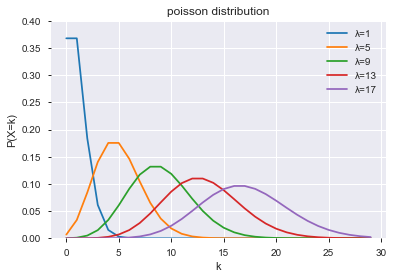

In [64]:
import numpy as np,matplotlib.pyplot as plt,math
# lam= 一定時間のくる確率 / k  = 一定時間
for lam in range(1,21,4):
    plt.ylim((0,0.4))
    po,x=[],[]    
    for k in range(0,30,1):
        po.append(np.exp(-lam)*lam**k/math.factorial(k))     
        x.append(k)
    plt.plot(x,po,label="λ={}".format(lam))
plt.xlabel("k")
plt.legend(loc="best")    #凡例を表示
plt.ylabel("P(X=k)")
plt.title("poisson distribution")
plt.show()

In [65]:
df["label_none"].rolling(window=30).mean()


0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
147    0.300000
148    0.333333
149    0.366667
150    0.366667
151    0.400000
Name: label_none, Length: 152, dtype: float64

In [66]:
#df["label_up"].rolling(window=30).mean()

#df["label_down"].rolling(window=30).mean()
lam=df["label_none"].rolling(window=30).mean()

po=np.exp(-lam)*lam